# Exploring CoinMarketCap API 
Write Cryptocurrency information into Excel and compare the top 10 cryptocurrency

In [2]:
import xlsxwriter
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [ ]:
start = 1
f = 1
workbook = xlsxwriter.Workbook('CoinMarketCap.xlsx')
sheet = workbook.add_worksheet()
sheet.write('A1', 'Name')
sheet.write('B1', 'Symbol')
sheet.write('C1', 'Market Cap')
sheet.write('D1', 'Price')
sheet.write('E1', '24H Volume')
sheet.write('F1', 'Hour Change')
sheet.write('G1', 'Day Change')
sheet.write('H1', 'Week Change')
for i in range(10):
    url= 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'100',
        'convert':'USD'}
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': myAPI,}
    session = Session()
    session.headers.update(headers)
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    data = data['data']
    for value in data:
        rankID = value['cmc_rank']
        Name = value['name']
        Symbol = value['symbol']
        quotes = value['quote']['USD']
        market_cap = quotes['market_cap']
        hour_change = quotes['percent_change_1h']
        day_change = quotes['percent_change_24h']
        week_change = quotes['percent_change_7d']
        price = quotes['price']
        volume = quotes['volume_24h']
                
        sheet.write(f,0,Name) 
        sheet.write(f,1,Symbol)
        sheet.write(f,2,str(market_cap))
        sheet.write(f,3,str(price))
        sheet.write(f,4,str(volume))
        sheet.write(f,5,str(hour_change))
        sheet.write(f,6,str(day_change))
        sheet.write(f,7,str(week_change))
        f += 1

    start += 100

workbook.close()

In [3]:
df=pd.read_excel('CoinMarketCap.xlsx')

In [4]:
df.head()

,Name,Symbol,Market Cap,Price,24H Volume,Hour Change,Day Change,Week Change
0,Bitcoin,BTC,2.027691e+11,10964.449535,2.784167e+10,-0.366436,1.223360,6.18564
1,Ethereum,ETH,4.341946e+10,385.424502,1.701181e+10,-0.354256,1.475910,4.89381
2,Tether,USDT,1.514358e+10,1.002169,4.751066e+10,-0.028095,0.074742,-0.0521134
3,XRP,XRP,1.136396e+10,0.252295,1.310570e+09,-0.471246,0.982050,4.23202
4,Polkadot,DOT,4.505139e+09,5.283705,6.244984e+08,-0.334763,1.520640,17.5303


## Compared  Bitcoin with the rest of the cryptocurrencies


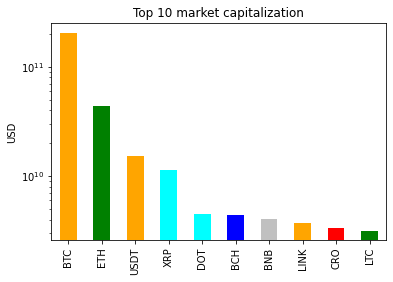

In [7]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = df[:10].set_index('Symbol')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x['Market Cap'] / df['Market Cap'].sum())*100)

# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10['Market Cap'].plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS)

# Annotating the y axis with log(USD)
ax.set_ylabel('USD')

# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('');